In [1]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

In [4]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# Create dataframe from TSV
df_image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#gather data from twitter 
# Twittter App Credentials
consumer_key = "7b2fTzv0D6hYBy0D8zt8Bj3wU"
consumer_secret = "QgZUEIShFnH0FhUCgSdgLGtwDLy38Crxc9RBHC0vfudvfqbeyp"
access_token = "1179780108988477440-aguQq6835FwEO1OZcOn15Nl5vH8aQl"
access_secret = "1SeCYA3Y9i5GpsXX0Kda6XX7mxDJQ4RhkvWG7n0XeHvbG"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
tweet_id_list = df_archive['tweet_id']

In [10]:
count = 0
fails_dict = {}
start = timer()


In [11]:
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id_list:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet, outfile)
            outfile.write("\n")
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

344: 832040443403784192
345: 832032802820481025
346: 831939777352105988
347: 831926988323639298
348: 831911600680497154
349: 831670449226514432
350: 831650051525054464
351: 831552930092285952
352: 831322785565769729
353: 831315979191906304
354: 831309418084069378
355: 831262627380748289
356: 830956169170665475
357: 830583320585068544
358: 830173239259324417
359: 830097400375152640
360: 829878982036299777
361: 829861396166877184
362: 829501995190984704
363: 829449946868879360
364: 829374341691346946
Fail
365: 829141528400556032
366: 829011960981237760
367: 828801551087042563
368: 828770345708580865
369: 828708714936930305
370: 828650029636317184
371: 828409743546925057
372: 828408677031882754
373: 828381636999917570
374: 828376505180889089
375: 828372645993398273
376: 828361771580813312
377: 828046555563323392
378: 828011680017821696
379: 827933404142436356
380: 827653905312006145
381: 827600520311402496
382: 827324948884643840
383: 827228250799742977
Fail
384: 827199976799354881
385: 8

685: 788178268662984705
686: 788150585577050112
687: 788070120937619456
688: 788039637453406209
689: 787810552592695296
690: 787717603741622272
691: 787397959788929025
692: 787322443945877504
693: 787111942498508800
694: 786963064373534720
695: 786729988674449408
696: 786709082849828864
697: 786664955043049472
698: 786595970293370880
699: 786363235746385920
700: 786286427768250368
701: 786233965241827333
702: 786051337297522688
703: 786036967502913536
704: 785927819176054784
705: 785872687017132033
706: 785639753186217984
707: 785533386513321988
708: 785515384317313025
709: 785264754247995392
710: 785170936622350336
711: 784826020293709826
712: 784517518371221505
713: 784431430411685888
714: 784183165795655680
715: 784057939640352768
716: 783839966405230592
717: 783821107061198850
718: 783695101801398276
719: 783466772167098368
720: 783391753726550016
721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 78272259879

1025: 746507379341139972
1026: 746369468511756288
1027: 746131877086527488
1028: 746056683365994496
1029: 745789745784041472
1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712
1059: 741793263812808706
1060: 741743634094141440
1061: 741438259667034112
1062: 741303864243200000
1063: 741099773336379392
1064: 741067306818797568


1353: 703774238772166656
1354: 703769065844768768
1355: 703631701117943808
1356: 703611486317502464
1357: 703425003149250560
1358: 703407252292673536
1359: 703382836347330562
1360: 703356393781329922
1361: 703268521220972544
1362: 703079050210877440
1363: 703041949650034688
1364: 702932127499816960
1365: 702899151802126337
1366: 702684942141153280
1367: 702671118226825216
1368: 702598099714314240
1369: 702539513671897089
1370: 702332542343577600
1371: 702321140488925184
1372: 702276748847800320
1373: 702217446468493312
1374: 701981390485725185
1375: 701952816642965504
1376: 701889187134500865
1377: 701805642395348998
1378: 701601587219795968
1379: 701570477911896070
1380: 701545186879471618
1381: 701214700881756160
1382: 700890391244103680
1383: 700864154249383937
1384: 700847567345688576
1385: 700796979434098688
1386: 700747788515020802
1387: 700518061187723268
1388: 700505138482569216
1389: 700462010979500032
1390: 700167517596164096
1391: 700151421916807169
1392: 700143752053182464


1681: 682003177596559360
1682: 681981167097122816
1683: 681891461017812993
1684: 681694085539872773
1685: 681679526984871937
1686: 681654059175129088
1687: 681610798867845120
1688: 681579835668455424
1689: 681523177663676416
1690: 681340665377193984
1691: 681339448655802368
1692: 681320187870711809
1693: 681302363064414209
1694: 681297372102656000
1695: 681281657291280384
1696: 681261549936340994
1697: 681242418453299201
1698: 681231109724700672
1699: 681193455364796417
1700: 680970795137544192
1701: 680959110691590145
1702: 680940246314430465
1703: 680934982542561280
1704: 680913438424612864
1705: 680889648562991104
1706: 680836378243002368
1707: 680805554198020098
1708: 680801747103793152
1709: 680798457301471234
1710: 680609293079592961
1711: 680583894916304897
1712: 680497766108381184
1713: 680494726643068929
1714: 680473011644985345
1715: 680440374763077632
1716: 680221482581123072
1717: 680206703334408192
1718: 680191257256136705
1719: 680176173301628928
1720: 680161097740095489


2009: 672256522047614977
2010: 672254177670729728
2011: 672248013293752320
2012: 672245253877968896
2013: 672239279297454080
2014: 672231046314901505
2015: 672222792075620352
2016: 672205392827572224
2017: 672169685991993344
2018: 672160042234327040
2019: 672139350159835138
2020: 672125275208069120
2021: 672095186491711488
2022: 672082170312290304
2023: 672068090318987265
2024: 671896809300709376
2025: 671891728106971137
2026: 671882082306625538
2027: 671879137494245376
2028: 671874878652489728
2029: 671866342182637568
2030: 671855973984772097
2031: 671789708968640512
2032: 671768281401958400
2033: 671763349865160704
2034: 671744970634719232
2035: 671743150407421952
2036: 671735591348891648
2037: 671729906628341761
2038: 671561002136281088
2039: 671550332464455680
2040: 671547767500775424
2041: 671544874165002241
2042: 671542985629241344
2043: 671538301157904385
2044: 671536543010570240
2045: 671533943490011136
2046: 671528761649688577
2047: 671520732782923777
2048: 671518598289059840


2337: 666273097616637952
2338: 666268910803644416
2339: 666104133288665088
2340: 666102155909144576
2341: 666099513787052032
2342: 666094000022159362
2343: 666082916733198337
2344: 666073100786774016
2345: 666071193221509120
2346: 666063827256086533
2347: 666058600524156928
2348: 666057090499244032
2349: 666055525042405380
2350: 666051853826850816
2351: 666050758794694657
2352: 666049248165822465
2353: 666044226329800704
2354: 666033412701032449
2355: 666029285002620928
2356: 666020888022790149
5190.381325682398
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 86681628028

In [12]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_info = pd.DataFrame.from_dict(data)

In [13]:
df_tweet_info


,favorite_count,id,retweet_count
0,36254,892420643555336193,7719
1,31260,892177421306343426,5706
2,23538,891815181378084864,3781
3,39526,891689557279858688,7869
4,37747,891327558926688256,8492
5,19013,891087950875897856,2841
6,11072,890971913173991426,1851
7,61066,890729181411237888,17222
8,26179,890609185150312448,3918
9,29894,890240255349198849,6706


### Data:
We now have altogether 3 datasets:
- **df_tweet**- Dataframe with retweet and favorite count
- **df_image_predictions**- Dataframe with image prediction data
- **df_archive** - Dataframe with archived tweets data

## Assessing the data

#### df_archive

In [14]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Daisy           7
Buddy           7
an              7
Bailey          7
Stanley         6
Dave            6
Jax             6
Jack            6
Koda            6
Leo             6
Milo            6
Scout           6
Oscar           6
Bella           6
Rusty           6
Louis           5
             ... 
Tessa           1
Rodney          1
Chef            1
Meera           1
Bode            1
Lili            1
Ziva            1
Link            1
Spanky          1
Jennifur        1
Kingsley        1
Vixen           1
Cal             1
Monkey          1
Frönq           1
Willow          1
Arlen           1
Ronnie          1
Linus           1
Stephanus       1
Ferg            1
Furzey          1
Toffee          1
Miguel          1
Kallie    

**Observation** 

Issue:
- There are names such as "a","an","the" which is very unlikely to be a dog's name.
- Datatype correction is needed (timestamp is shown as object)
- Some entries are retweets (we need to avoid those)
- Some missing values

Tidiness:
- Four columns (doggo, floofer, pupper, and puppo) can be made into one.


#### df_tweet dataframe

In [19]:
df_tweet_info

,favorite_count,id,retweet_count
0,36254,892420643555336193,7719
1,31260,892177421306343426,5706
2,23538,891815181378084864,3781
3,39526,891689557279858688,7869
4,37747,891327558926688256,8492
5,19013,891087950875897856,2841
6,11072,890971913173991426,1851
7,61066,890729181411237888,17222
8,26179,890609185150312448,3918
9,29894,890240255349198849,6706


In [20]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [21]:
df_tweet_info.describe()

,favorite_count,id,retweet_count
count,2331.000000,2.331000e+03,2331.000000
mean,7569.649078,7.419079e+17,2707.922351
std,11747.326100,6.823170e+16,4579.249462
min,0.000000,6.660209e+17,1.000000
25%,1319.500000,6.782670e+17,548.000000
50%,3295.000000,7.182469e+17,1269.000000
75%,9265.500000,7.986692e+17,3146.500000
max,156384.000000,8.924206e+17,77938.000000


**Observation**

Issues:
- There are some missing data as df_archive have total 2356 rows but df_tweet only has 2331 rows. 

#### df_image_predictions

In [22]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**Observation**

Issues: 
- There are some missing data as df_archive has in total 2356 rows but df_image_predictions only has 2075 rows. 
- There also seems to be an inconsistency with the casing for p1,p1,p3 (some are titlecase, some lowercase, etc)

### Final Data

We will be cleaning the data and merging it to make a final dataset to perform our analysis.

Tidiness:
- We will get rid of data columns related to retweets as we are ignoring retweets.

**df_twitter_master** : This Dataframe will store the final data

# Data Wrangling

In [25]:
df_twitter_master = df_archive.copy()

### df_archive

#### removing the dog name "a", "an" and "the"

In [26]:
def replace_names(row):
    if (row['name'] == 'a') or (row['name'] == 'an') or (row['name'] == 'the'):        
        #finding the name to replace with a or an or the        
        text = row['text']
        word_list = text.split()
        name = 'None'
        # get name from 'named {}'
        if 'named' in word_list:
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]
        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]
        #only replace the 'name' column
        row['name'] = name.replace('.','')
        # Return row whether updated or name
    return row
    

df_twitter_master  = df_twitter_master.apply(replace_names, axis=1)

In [27]:
df_twitter_master['name'].value_counts()

None          794
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
Toby            7
Buddy           7
Bailey          7
Daisy           7
Oscar           6
Koda            6
Bella           6
Milo            6
Stanley         6
Jax             6
Dave            6
Jack            6
Rusty           6
Scout           6
Leo             6
Larry           5
Chester         5
Bentley         5
Sammy           5
             ... 
Laela           1
Tessa           1
Rodney          1
Chef            1
Meera           1
Ziva            1
Stephanus       1
Shnuggles       1
Ronnie          1
Link            1
Jennifur        1
Kingsley        1
Vixen           1
Cal             1
Monkey          1
Frönq           1
Willow          1
Arlen           1
Spanky          1
Stormy          1
Linus           1
Ferg            1
Furzey          1
Toffee          1
Miguel    

**Observation**:
The dog name in the data is cleaned.

#### Correcting the datatypes

In [28]:
#Correcting the timestamp

df_twitter_master.timestamp = pd.to_datetime(df_twitter_master.timestamp)

df_twitter_master.retweeted_status_timestamp = pd.to_datetime(df_twitter_master.retweeted_status_timestamp)

In [29]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes

**Observation**:
The timestamp datatype is fixed

#### cleaning data that are retweets

In [30]:
# Find all the retweets 
retweets = df_twitter_master.text.str.match('^RT @')


In [31]:

#Getting rid of retweets
df_twitter_master = df_twitter_master[~retweets]

In [32]:
retweets = df_twitter_master.text.str.match('^RT @')

df_twitter_master[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Combining the columns into one

In [33]:
#adding a new column
df_twitter_master['dog_stage'] = 'None'


In [34]:
#function to combine all the columns
def get_dog_stage(row):
    dog_stage = []
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: 
        row['dog_stage'] = 'None'
    else: 
        row['dog_stage'] = ','.join(dog_stage)
    
    return row


In [35]:
df_twitter_master = df_twitter_master.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_twitter_master =df_twitter_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [36]:
df_twitter_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


**Observation**:
We have combined all the four columns

### df_tweet_info

#### Fixing the missing data issue by combining the df_tweet with df_twitter_master and only keeping the data that is in both dataset

In [38]:
df_tweet_info.rename(columns={'id':'tweet_id'}, inplace=True)

df_twitter_master = pd.merge(df_twitter_master, df_tweet_info, how='left', on=['tweet_id'])

In [39]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
favorite_count                2168 non-null float64
retweet_count                 2168 non-null float64
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int

**Observation**:
We have got rid of the missing data from df_tweet

### df_image_predictions

#### Fixing the missing data issue by combining the df_image_predictions with df_twitter_master and only keeping the data that is in both dataset

In [40]:
df_image_predictions.rename(columns={'id':'tweet_id'}, inplace=True)

df_twitter_master = pd.merge(df_twitter_master, df_image_predictions, how='left', on=['tweet_id'])

In [41]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
favorite_count                2168 non-null float64
retweet_count                 2168 non-null float64
jpg_url                       1994 non-null object
img_num        

**Observation**:
We have got rid of the missing data from df_image_predictions

#### Convert case to lower to maintain the consistency in p1,p2,p3

In [42]:
df_twitter_master['p1'] = df_twitter_master['p1'].str.lower()
df_twitter_master['p2'] = df_twitter_master['p2'].str.lower()
df_twitter_master['p3'] = df_twitter_master['p3'].str.lower()



In [43]:
df_twitter_master[['p1','p2','p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer


**Observation** : We have made the case consistent

### df_twitter_master

In [44]:
# Drop all columns that relate to retweet  
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_twitter_master = df_twitter_master.drop(retweet_cols, axis=1)

In [45]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
favorite_count           2168 non-null float64
retweet_count            2168 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf

### Saving the dataset as csv

In [46]:
df_twitter_master.to_csv('twitter_archive_master.csv')

# Exploring the cleaned data

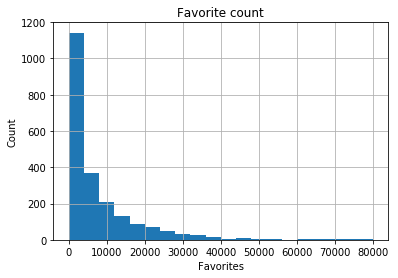

In [47]:
#If we tweet the post of our dog, how many favourite count can we expect?

df_twitter_master.hist(column='favorite_count', bins=20, range=(0,80000));
plt.title('Favorite count')
plt.xlabel('Favorites')
plt.ylabel('Count');

**Observation** : 
Seems like most of the tweets gets around 0 to 10000 and only few tweets seems to break that boundary.

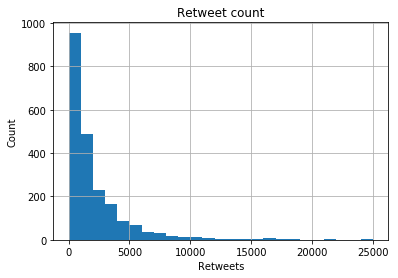

In [48]:
#If we tweet the post of our dog, how many retweets are we most likely to get?

df_twitter_master.hist(column='retweet_count', bins=25, range=(0,25000));
plt.title('Retweet count')
plt.xlabel('Retweets')
plt.ylabel('Count');

**Observation** : 
The retweet seems to follow the similar pattern to favourite_count. Most of the tweets seems to be retweeted about 0 to 5000 times and only few tweets seems to cross this range.

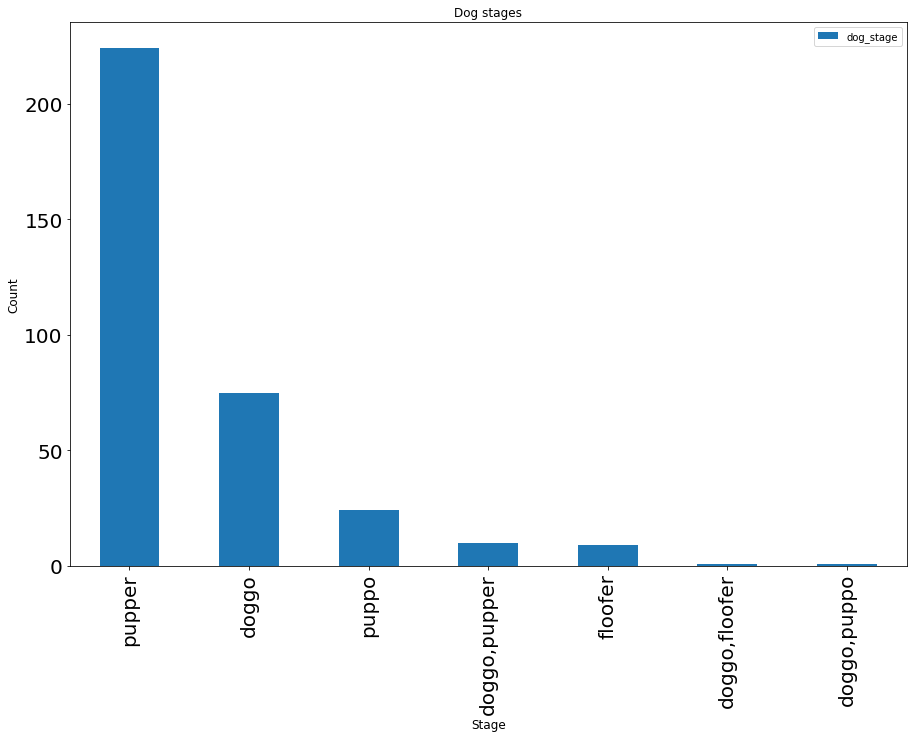

In [49]:
#Which stage dogs has maximum tweets?

dog_stage = df_twitter_master[df_twitter_master['dog_stage'] != "None"].dog_stage.value_counts()

ax = (dog_stage).plot(kind='bar', title ="Dog stages", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("Stage", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()



**Observation**: 

Most of the tweets are of dogs in stage ,"pupper"

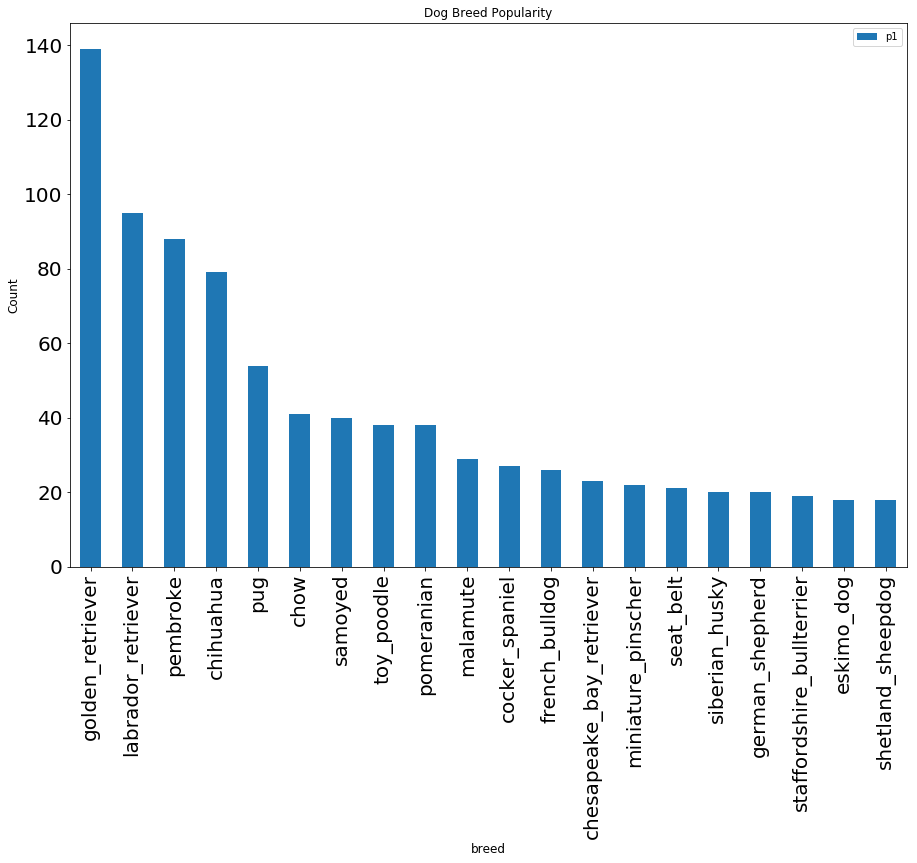

In [50]:
# Which breed of dog seems to be most popular?


breed = df_twitter_master[df_twitter_master['p1'] != "None"].p1.value_counts().head(20)

ax = (breed).plot(kind='bar', title ="Dog Breed Popularity", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("breed", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()


**Observation**:
It seems golden retriever and labradors are really popular.

## Conclusion:

After wrangling the data and combining all the data we were able to find many meaningful insights from the data.Such as the range of numbers of retweets and favourite we are likely to get. Also, we were able to find the most popular stage of dog and also the most popular breed of dogs.

## Limitation:
There are alot of insights we can draw out from the data than the insights drawn out in this analysis.